In [52]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import imblearn
import lightgbm
import hyperopt

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import plusmodules as pm
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv('US_Heart_Patients.csv')

In [29]:
df=df.sample(frac=1, random_state=3)

In [19]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [20]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [21]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

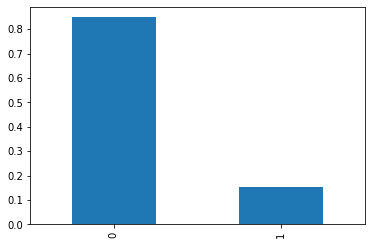

In [22]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()

In [23]:
mv=df.isnull().sum()
mv[mv>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [24]:
df=df.fillna(method='ffill')
df.head()
# filling all the null values using forward filing method in order not to change the distribution

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


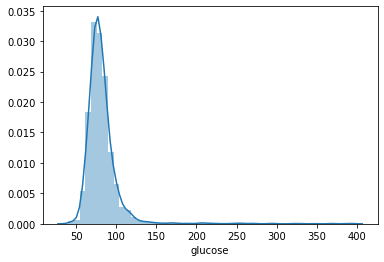

In [13]:
sns.distplot(df['glucose'].dropna())
# this plot is for column glucose without null values

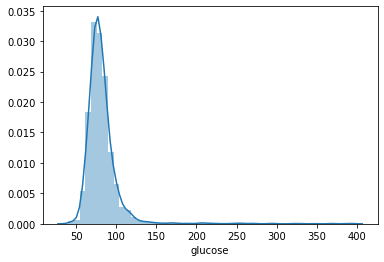

In [14]:
sns.distplot(df['glucose'])
#this plot is after filling the null values with the median value for column glucose

In [15]:
df['glucose'].describe()

count    4240.000000
mean       81.780896
std        23.257604
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

if we see the values that we have change in the distribution in order not to change the distribution we just change the format of filling the null values to forward and backward filling

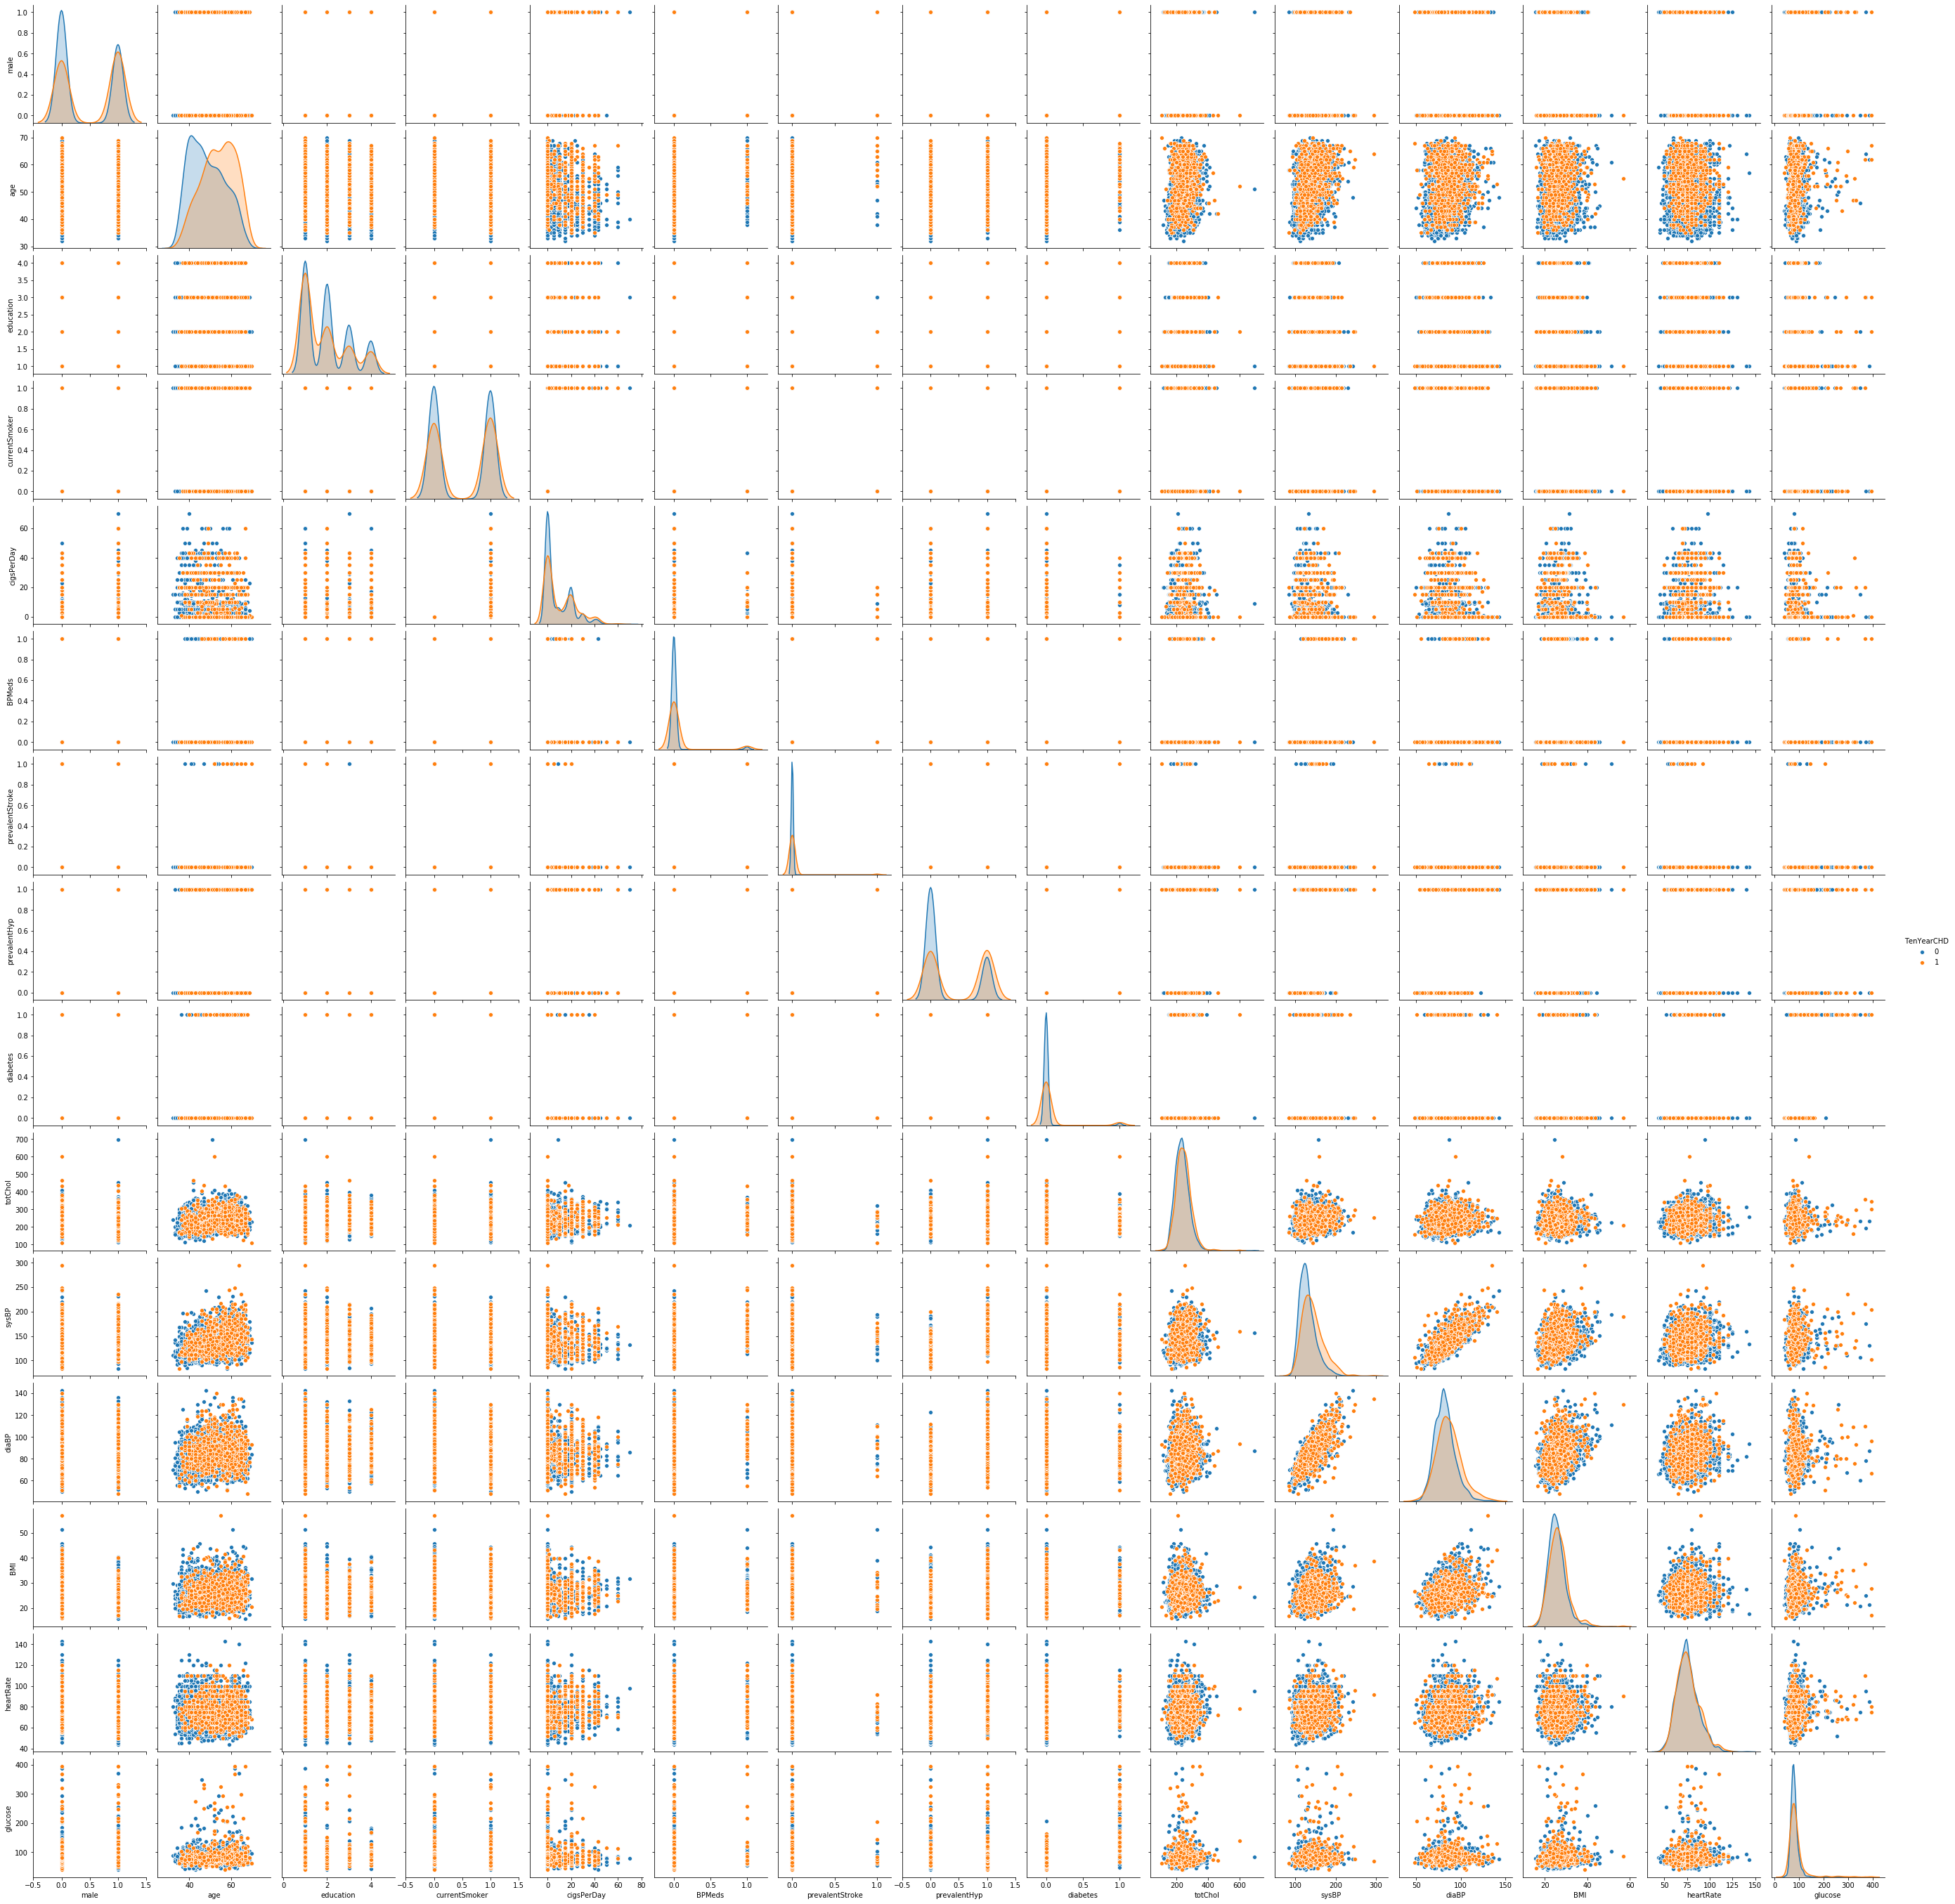

In [16]:
sns.pairplot(df, hue='TenYearCHD')

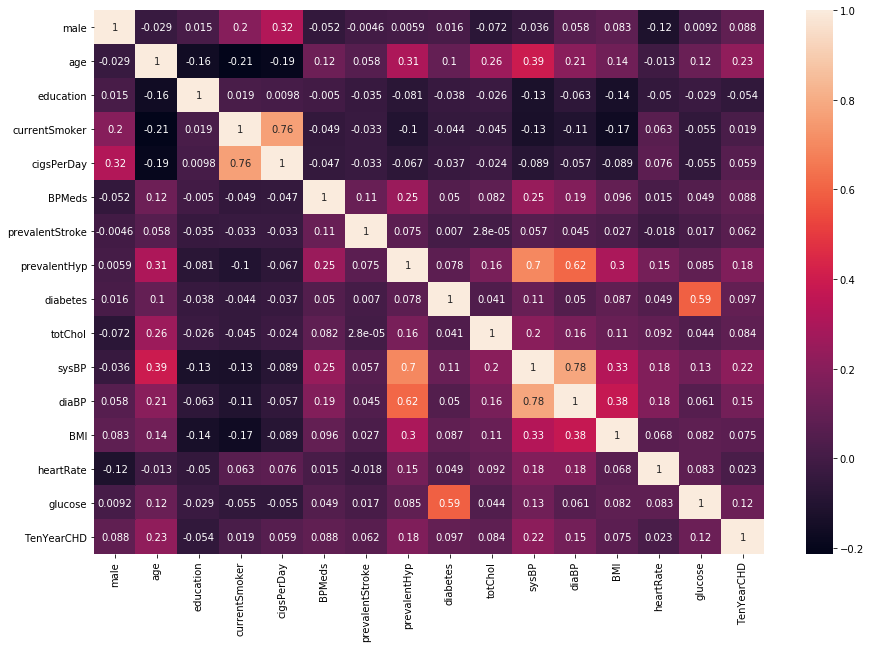

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

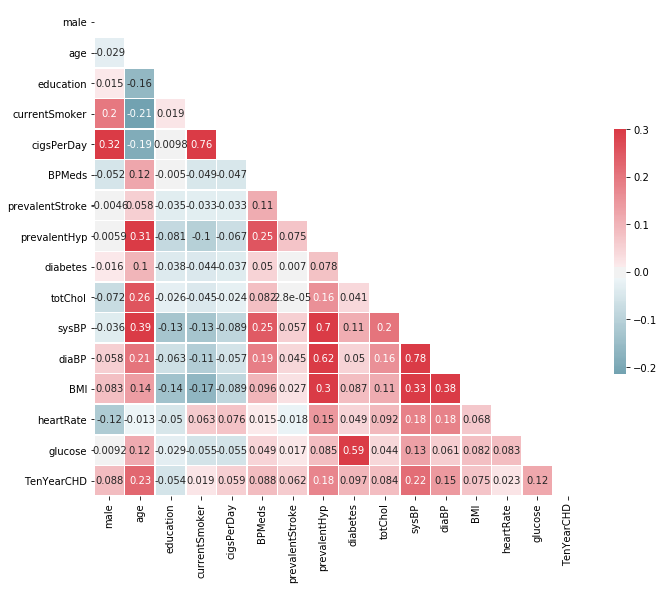

In [18]:
import plusmodules as pm
pm.corr_matrix(df)

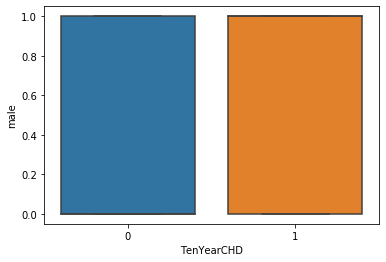

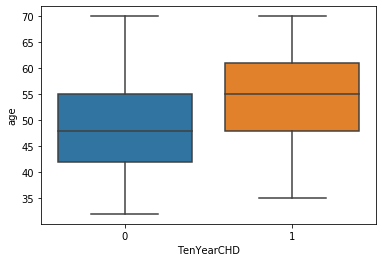

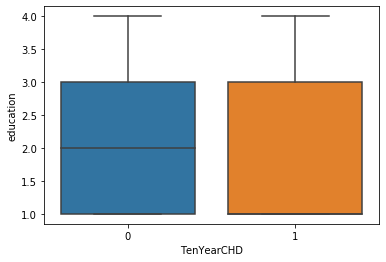

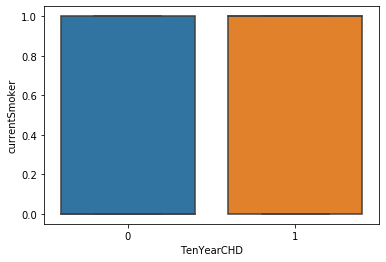

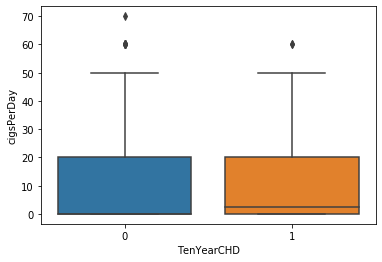

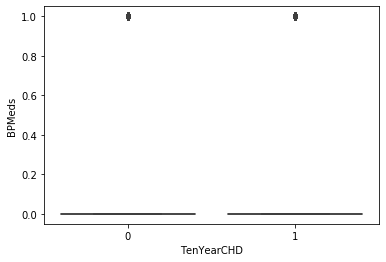

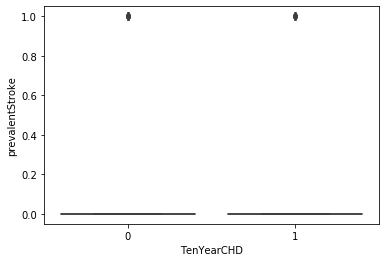

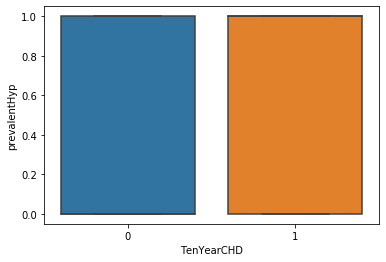

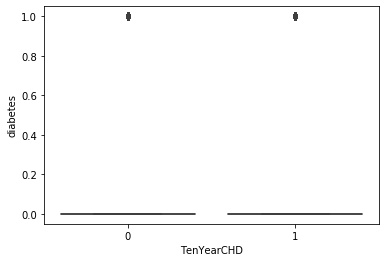

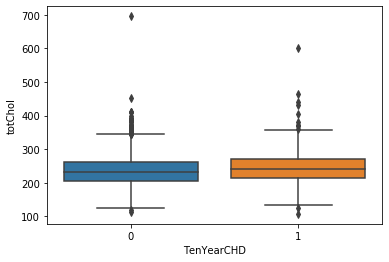

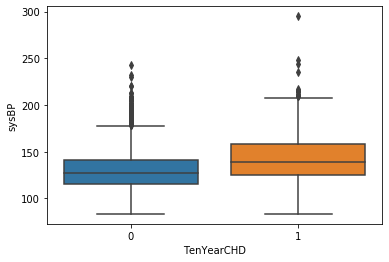

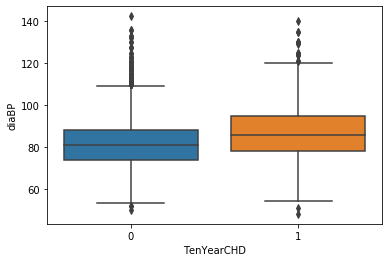

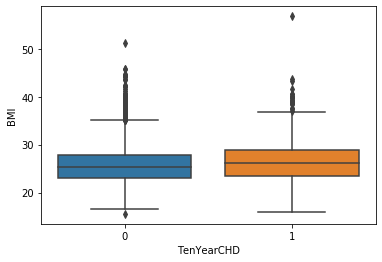

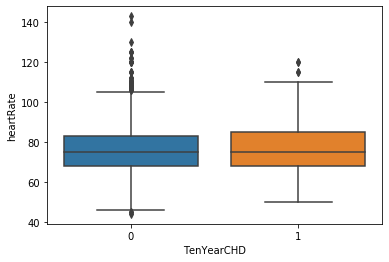

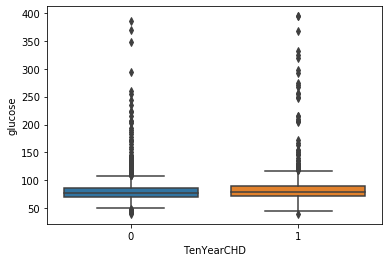

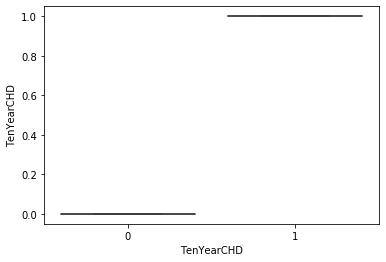

In [19]:
cols=list(df.columns)

for col in cols:
    sns.boxplot(y=df[col],x=df['TenYearCHD'])
    plt.show()

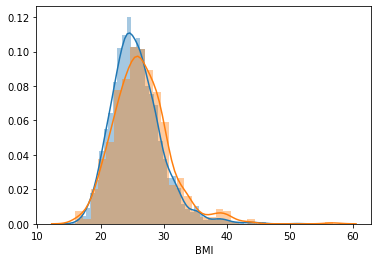

In [20]:
df0= df[df['TenYearCHD']==0]
df1= df[df['TenYearCHD']==1]
sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])

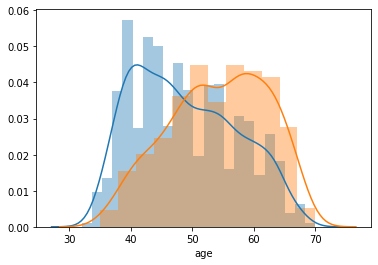

In [21]:
df0= df[df['TenYearCHD']==0]
df1= df[df['TenYearCHD']==1]
sns.distplot(df0['age'])
sns.distplot(df1['age'])

In [22]:
x=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']
con=sm.add_constant(x)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.DataFrame([vif(con.values , i) for i in range(con.shape[1])], index=con.columns, columns=['VIF'])

,VIF
const,197.703826
male,1.197415
age,1.368623
education,1.052772
currentSmoker,2.490359
cigsPerDay,2.618425
BPMeds,1.097285
prevalentStroke,1.018798
prevalentHyp,2.050602
diabetes,1.551588


BUILDING LOGISTIC REGRESSION MODEL

In [24]:
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.397264
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                 0.06739
Time:                        10:40:25   Log-Likelihood:                -1684.4
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.601e-44
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3752      0.097      3.863      0.000       0.185       0.566
age                 0.0282      0.005      5.177      0.000       0.018       0.039
education          -0.1652      0.044     -3.732      0.000      -0.252      -0.078
currentSmoker      -0.2588      0.140     -1.842      0.065      -0.534       0.017
cigsPerDay          0.0232      0.006      4.114      0.000       0.012       0.034
BPMeds              0.4356      0.214      2.035      0.042       0.016       0.855
prevalentStroke     0.8754      0.436      2.006      0.045       0.020       1.731
prevalentHyp        0.9055      0.116      7.839      0.000       0.679       1.132
diabetes            0.8494      0.275      3.092      0.002       0.311       1.388
totChol            -0.0011      0.001     -1.112      0.266      -0.003       0.001
sysBP               0.0114      0.004      3.233      0.001       0.004       0.018
diaBP              -0.0245      0.006     -4.305      0.000      -0.036      -0.013
BMI                -0.0507      0.011     -4.447      0.000      -0.073      -0.028
heartRate          -0.0200      0.004     -5.460      0.000      -0.027      -0.013
glucose             0.0015      0.002      0.746      0.456      -0.002       0.005
===================================================================================
"""

coeff values gives the limit of the curve which is for age we get it as 0.0619 and the area for age lies in between +0.0619 and -0.0619 and the pvalue is 0.000 so based on the pvalue, if we get higher p value then the feature is not significant otherwise it is significant.

based on the p vlaue and the significance we remove the features which have the highest pvalue 

In [25]:
# we do backward elimination process to remove the insignificant features which are not required for the model 

In [26]:
p=model.pvalues
p

male               1.120983e-04
age                2.255895e-07
education          1.903272e-04
currentSmoker      6.542441e-02
cigsPerDay         3.885736e-05
BPMeds             4.185155e-02
prevalentStroke    4.481306e-02
prevalentHyp       4.523480e-15
diabetes           1.987960e-03
totChol            2.661457e-01
sysBP              1.224859e-03
diaBP              1.666984e-05
BMI                8.698494e-06
heartRate          4.759197e-08
glucose            4.557022e-01
dtype: float64

In [27]:
cols=list(con.columns)

while len(cols)>1:
    x1=con[cols]
    model=sm.Logit(y, x1).fit()
    p=model.pvalues
    max_p=max(p)
    feature_maxp=p.idxmax()
    
    if max_p>0.05:
        print('\n')
        print('column removed: ', feature_maxp, 'prob :', max_p)
        cols.remove(feature_maxp)
    else:
        break
cols

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


column removed:  currentSmoker prob : 0.9248067145320612
Optimization terminated successfully.
         Current function value: 0.378370
         Iterations 7


column removed:  BMI prob : 0.818347435155813
Optimization terminated successfully.
         Current function value: 0.378376
         Iterations 7


column removed:  heartRate prob : 0.6936547572101218
Optimization terminated successfully.
         Current function value: 0.378395
         Iterations 7


column removed:  education prob : 0.7021584464005117
Optimization terminated successfully.
         Current function value: 0.378412
         Iterations 7


column removed:  diaBP prob : 0.6177168524266301
Optimization terminated successfully.
         Current function value: 0.378441
         Iterations 7


column removed:  diabetes prob : 0.4300198717944336
Optimization terminated successfully.
         Current function va

['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [28]:
model=sm.Logit(y, con[cols]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379099
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1100
Time:                        10:40:25   Log-Likelihood:                -1607.4
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.410e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8484      0.438    -20.220      0.000      -9.706      -7.991
male                0.5096      0.098      5.184      0.000       0.317       0.702
age                 0.0635      0.006     10.632      0.000       0.052       0.075
cigsPerDay          0.0212      0.004      5.510      0.000       0.014       0.029
prevalentStroke     1.0675      0.437      2.443      0.015       0.211       1.924
totChol             0.0021      0.001      2.081      0.037       0.000       0.004
sysBP               0.0167      0.002      8.299      0.000       0.013       0.021
glucose             0.0074      0.002      4.579      0.000       0.004       0.011
===================================================================================
"""

AGE

1. positive sign of age indicates that probability of CHD increases with age
2. log(odds) of CHD increased by 0.0646 when age increased by 1 year
3. as the age increases by 1 years then odds(CHD) increases by 6 percent (1.066-1)

In [29]:
exp_b=pd.DataFrame({'coef': model.params, 'exp_coef':np.exp(model.params)})
exp_b

,coef,exp_coef
const,-8.848368,0.000144
male,0.509623,1.664664
age,0.063459,1.065516
cigsPerDay,0.021153,1.021378
prevalentStroke,1.067451,2.907957
totChol,0.002113,1.002115
sysBP,0.016687,1.016827
glucose,0.007373,1.007400


#MALE

1. positive value of male says that there is more chances for CHD in male when compared to female
2. log(odds) of CHD for male is 0.4897 higher when compared to female
3. odds(CHD) of male is 63% (exp_coef-1) greater than female

In [30]:
x_prob=con[cols]
x_prob['y']=y.values

In [31]:
x_prob.head()

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose,y
3546,1.0,0,54,0.0,0,241.0,106.0,74.0,0
1127,1.0,0,42,10.0,0,253.0,109.0,60.0,0
3088,1.0,0,58,0.0,1,274.0,159.0,81.0,0
437,1.0,1,45,30.0,0,240.0,141.0,76.0,0
3188,1.0,1,63,0.0,0,190.0,148.0,86.0,0


In [32]:
x_prob.to_csv('x_prob.csv')

In [33]:
prob=model.predict(con[cols])

In [34]:
type(prob)

pandas.core.series.Series

In [35]:
prob

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
          ...   
789     0.344482
968     0.120925
1667    0.171440
3321    0.193964
1688    0.038748
Length: 4240, dtype: float64

In [36]:
prob=pd.DataFrame(prob, columns=['prob'])
prob.head()

,prob
3546,0.069264
1127,0.040086
3088,0.432654
437,0.193365
3188,0.302438


In [44]:
prob['y_est']=prob['prob'].apply(lambda x: 1 if x>0.5 else 0)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [46]:
prob['y']=y.values

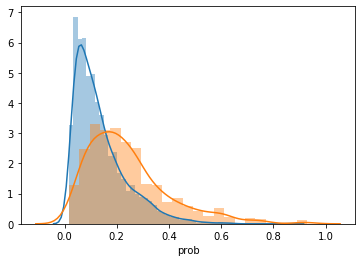

In [47]:
df0=prob[prob['y']==0]
df1=prob[prob['y']==1]
sns.distplot(df0['prob'])
sns.distplot(df1['prob'])

In [48]:
#Classification report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [51]:
confusion_matrix(y, prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [50]:
accuracy_score(y,prob['y_est'])

0.8542452830188679

# ROC analysis

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

In [55]:
print('AUC value for the model is :', roc_auc_score(y, prob['prob']))

AUC value for the model is : 0.7304199282847056


In [68]:
fpr, tpr, thresholds = roc_curve(y, prob['prob'])

In [69]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78086763e-04,
       2.78086763e-04, 5.56173526e-04, 5.56173526e-04, 8.34260289e-04,
       8.34260289e-04, 1.39043382e-03, 1.39043382e-03, 2.22469410e-03,
       2.22469410e-03, 2.50278087e-03, 2.50278087e-03, 2.78086763e-03,
       2.78086763e-03, 3.33704116e-03, 3.33704116e-03, 3.61512792e-03,
       3.61512792e-03, 3.89321468e-03, 3.89321468e-03, 4.44938821e-03,
       4.44938821e-03, 4.72747497e-03, 4.72747497e-03, 5.00556174e-03,
       5.00556174e-03, 5.28364850e-03, 5.28364850e-03, 6.67408231e-03,
       6.67408231e-03, 7.23025584e-03, 7.23025584e-03, 8.89877642e-03,
       8.89877642e-03, 9.73303671e-03, 9.73303671e-03, 1.02892102e-02,
       1.02892102e-02, 1.16796440e-02, 1.16796440e-02, 1.25139043e-02,
       1.25139043e-02, 1.27919911e-02, 1.27919911e-02, 1.36262514e-02,
       1.36262514e-02, 1.44605117e-02, 1.44605117e-02, 1.47385984e-02,
       1.47385984e-02, 1.50166852e-02, 1.50166852e-02, 1.52947720e-02,
      

In [70]:
tpr

array([0.        , 0.0015528 , 0.00465839, 0.00465839, 0.02173913,
       0.02173913, 0.02329193, 0.02329193, 0.02639752, 0.02639752,
       0.04037267, 0.04037267, 0.04813665, 0.04813665, 0.05279503,
       0.05279503, 0.05434783, 0.05434783, 0.05590062, 0.05590062,
       0.05745342, 0.05745342, 0.05900621, 0.05900621, 0.06055901,
       0.06055901, 0.0636646 , 0.0636646 , 0.07453416, 0.07453416,
       0.07608696, 0.07608696, 0.08229814, 0.08229814, 0.08385093,
       0.08385093, 0.08695652, 0.08695652, 0.0931677 , 0.0931677 ,
       0.0947205 , 0.0947205 , 0.09782609, 0.09782609, 0.10248447,
       0.10248447, 0.10403727, 0.10403727, 0.10559006, 0.10559006,
       0.11024845, 0.11024845, 0.11180124, 0.11180124, 0.11645963,
       0.11645963, 0.11956522, 0.11956522, 0.12111801, 0.12111801,
       0.12267081, 0.12267081, 0.1242236 , 0.1242236 , 0.1257764 ,
       0.1257764 , 0.12732919, 0.12732919, 0.12888199, 0.12888199,
       0.13043478, 0.13043478, 0.13198758, 0.13198758, 0.13354

In [71]:
thresholds[0]=thresholds[0]-1
thresholds

array([0.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [72]:
roc=pd.DataFrame({'fpr': fpr,'tpr': tpr,'thresholds': thresholds, })

In [73]:
roc

,fpr,tpr,thresholds
0,0.000000,0.000000,0.928660
1,0.000000,0.001553,0.928660
2,0.000000,0.004658,0.913129
3,0.000278,0.004658,0.858071
4,0.000278,0.021739,0.644514
...,...,...,...
975,0.998888,0.996894,0.018324
976,0.998888,0.998447,0.018137
977,0.999166,0.998447,0.017470
978,0.999166,1.000000,0.017444


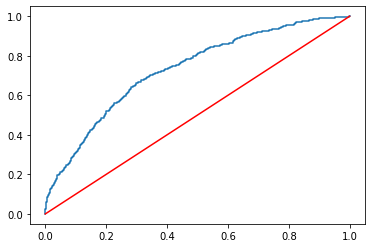

In [90]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')


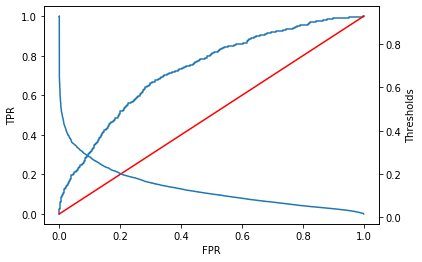

In [86]:
fig, ax= plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr, fpr, 'red')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.set_ylabel('Thresholds')
ax1.plot(fpr, thresholds)
plt.show()

In [92]:
roc[(roc['tpr']>=0.80) & (roc['tpr']<=0.81)]

,fpr,tpr,thresholds
738,0.494160,0.801242,0.109596
739,0.496663,0.801242,0.109258
740,0.496663,0.802795,0.109103
741,0.497497,0.802795,0.109003
742,0.497497,0.804348,0.108997
743,0.498331,0.804348,0.108638
744,0.498331,0.805901,0.108583
745,0.498610,0.805901,0.108400
746,0.498610,0.809006,0.108310
747,0.499166,0.809006,0.108284


if the model is good then we might have got the value of fpr as very low with higher tpr, higher tpr and lower fpr says the threshold value